In [7]:
!ls /home/tungnguyendinh/.fastai/data/pascal_2007/

segmentation  test.csv	 train	    train.json
test	      test.json  train.csv  valid.json


In [10]:
!ls /home/tungnguyendinh/.fastai/data/pascal_2007/train

000005.jpg  001688.jpg	003320.jpg  005004.jpg	006638.jpg  008307.jpg
000007.jpg  001689.jpg	003325.jpg  005006.jpg	006643.jpg  008310.jpg
000009.jpg  001690.jpg	003327.jpg  005007.jpg	006645.jpg  008311.jpg
000012.jpg  001691.jpg	003330.jpg  005014.jpg	006647.jpg  008312.jpg
000016.jpg  001693.jpg	003331.jpg  005016.jpg	006648.jpg  008313.jpg
000017.jpg  001699.jpg	003335.jpg  005018.jpg	006652.jpg  008315.jpg
000019.jpg  001707.jpg	003336.jpg  005020.jpg	006654.jpg  008316.jpg
000020.jpg  001708.jpg	003337.jpg  005023.jpg	006657.jpg  008317.jpg
000021.jpg  001711.jpg	003338.jpg  005024.jpg	006658.jpg  008318.jpg
000023.jpg  001713.jpg	003339.jpg  005026.jpg	006660.jpg  008319.jpg
000024.jpg  001714.jpg	003343.jpg  005027.jpg	006661.jpg  008320.jpg
000026.jpg  001717.jpg	003344.jpg  005028.jpg	006664.jpg  008322.jpg
000030.jpg  001718.jpg	003349.jpg  005029.jpg	006666.jpg  008323.jpg
000032.jpg  001721.jpg	003350.jpg  005032.jpg	006667.jpg  008326.jpg
000033.jpg  001723.jpg	003351.jpg 

In [93]:
import os
import sys

import torch
import torchvision
import torchvision.transforms as tvtf
from torch.utils.data import Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
from typing import Tuple

In [12]:
data_path = '/home/tungnguyendinh/.fastai/data/pascal_2007/'

## 1. Setup the data
### Dataset Object

In [61]:
class PascalVOCDataset(Dataset):
    def __init__(self, data_path, csv_file, transform=None, is_test=False, is_valid=False):
        self.data_path = data_path
        self.csv_file = csv_file
        self.transform = transform
        self.is_test = is_test

        # load CSV file containing annotations
        self.annotations = pd.read_csv(os.path.join(data_path, csv_file)) # N * 3

        # filter validation data based on 'is_valid' column
        if is_test:
            pass
        else:
            if is_valid:
                self.annotations = self.annotations[self.annotations['is_valid']==True]
            else:
                self.annotations = self.annotations[self.annotations['is_valid']==False]

    
    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index: int) -> Tuple[torch.Tensor, str]:
        # get image filename and label at specified index:
        img_filename = self.annotations.iloc[index, 0]
        label = self.annotations.iloc[index, 1]
        
        # load image
        img_path = os.path.join(self.data_path, 'train', img_filename) if not self.is_test else os.path.join(self.data_path, 'test', img_filename)
        img = Image.open(img_path).convert('RGB')

        # apply transformations
        if self.transform:
            img = self.transform(img)
        
        return img, label
        

### Transforms
- Train and eval/test get different transformations

In [104]:
mean = [.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]


train_transform = tvtf.Compose([
    tvtf.Resize((300, 300)),
    tvtf.RandomCrop((256, 256)),
    tvtf.RandomHorizontalFlip(p=0.2),
    tvtf.ToTensor(),
    tvtf.Normalize(mean=mean, std=std)
])

eval_test_transform = tvtf.Compose([
    tvtf.Resize((300, 300)),
    tvtf.CenterCrop((256, 256)),
    tvtf.RandomHorizontalFlip(p=0.25),
    tvtf.ToTensor(),
    tvtf.Normalize(mean=mean, std=std)
])



# train_ds
ds_train = PascalVOCDataset(data_path, 'train.csv', transform=train_transform, is_test=False, is_valid=False)

# valid_ds
ds_valid = PascalVOCDataset(data_path, 'train.csv', transform=eval_test_transform, is_test=False, is_valid=True)

# test_ds
ds_test = PascalVOCDataset(data_path, 'test.csv', transform=eval_test_transform, is_test=True, is_valid=False)



### DataLoader

In [109]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
num_workers = 2

dl_train = DataLoader(ds_train, batch_size=BATCH_SIZE, shuffle=True, num_workers=num_workers) 
dl_valid = DataLoader(ds_valid, batch_size=BATCH_SIZE, shuffle=False, num_workers=num_workers)
dl_test = DataLoader(ds_test, batch_size=BATCH_SIZE, shuffle=False, num_workers=num_workers)

## Images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


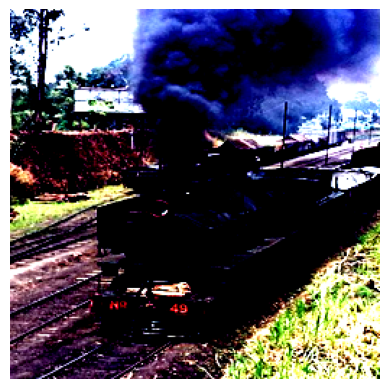

In [110]:
def plot_img(ds, index: int):
    image = ds[index][0].numpy().transpose((1, 2, 0)) # c, h, w -> h, w, c
    plt.imshow(image)
    plt.axis('off')
    plt.show()


plot_img(ds_train, 6)

In [113]:
def plot_multiple(ds):
    figure = plt.figure(figsize=(8, 8))
    cols, rows = 3, 3

    for i in range(1, cols * rows + 1):
        sample_idx = torch.randint(len(ds), size=(1, )).item()
        img, label = ds[sample_idx]
        figure.add_subplot(rows, cols, i)

        
        plt.title(label)
        plt.axis('off')
        plt.imshow(img.squeeze().permute(1, 2, 0), cmap='gray')
    
    plt.show();

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


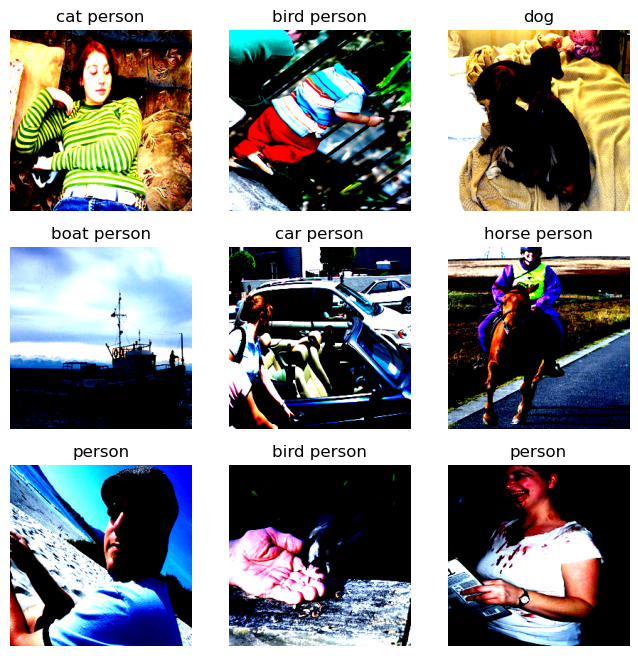

In [116]:
plot_multiple(ds_train)

## Modifying Labels
- Since we are performing Multi-label classification, we need to make a few adjustments:
    - change label from a single scalar (representing the class) to an `n_classes` binary vector, indicating all present classes.
    - other changes which will be covered later